In [ ]:
!pip install tokenizers
!pip install transformers

Importing the modules we will be needing for the Project.

In [3]:
import numpy as np
import pandas as pd
from tokenizers import BertWordPieceTokenizer
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


Importing the pretrained Bert-tokenizer from huggin face.

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Creating the sample of answers for testing

In [7]:
answers = [i for i in range(14)]

answers[0] = "Within the field of machine learning, there are two main types of tasks: supervised, and unsupervised. The main difference between the two types is that supervised learning is done using a ground truth, or in other words, we have prior knowledge of what the output values for our samples should be. Therefore, the goal of supervised learning is to learn a function that, given a sample of data and desired outputs, best approximates the relationship between input and output observable in the data. Unsupervised learning, on the other hand, does not have labeled outputs, so its goal is to infer the natural structure present within a set of data points."
answers[1] = "The main distinction between the two approaches is the use of labeled datasets. To put it simply, supervised learning uses labeled input and output data, while an unsupervised learning algorithm does not.In supervised learning, the algorithm “learns” from the training dataset by iteratively making predictions on the data and adjusting for the correct answer.Unsupervised learning models, in contrast, work on their own to discover the inherent structure of unlabeled data."
answers[2] = "In a supervised learning model, the algorithm learns on a labeled dataset, providing an answer key that the algorithm can use to evaluate its accuracy on training data. An unsupervised model, in contrast, provides unlabeled data that the algorithm tries to make sense of by extracting features and patterns on its own."

answers[3] = "While psychopaths are classified as people with little or no conscience, sociopaths do have a limited, albeit weak, ability to feel empathy and remorse. Psychopaths can and do follow social conventions when it suits their needs. Sociopaths are more likely to fly off the handle and react violently whenever they're confronted by the consequences of their actions. "
answers[4] = "A key difference between a psychopath and a sociopath is whether he has a conscience, the little voice inside that lets us know when we’re doing something wrong, says L. Michael Tompkins, EdD. He's a psychologist at the Sacramento County Mental Health Treatment Center.A psychopath doesn’t have a conscience. If he lies to you so he can steal your money, he won’t feel any moral qualms, though he may pretend to. He may observe others and then act the way they do so he’s not “found out,” Tompkins says.A sociopath typically has a conscience, but it’s weak. They may know that taking your money is wrong, and they might feel some guilt or remorse, but that won’t stop their behavior.Both lack empathy, the ability to stand in someone else’s shoes and understand how they feel. But a psychopath has less regard for others, says Aaron Kipnis, PhD, author of The Midas Complex. Someone with this personality type sees others as objects he can use for his own benefit."
answers[5] = "Psychopaths, in general, have a hard time forming real emotional attachments with others. Instead, they form artificial, shallow relationships designed to be manipulated in a way that most benefits the psychopath. People are seen as pawns to be used to forward the psychopath’s goals. Psychopaths rarely feel guilt regarding any of their behaviors, no matter how much they hurt others.Sociopaths, in general, tend to be more impulsive and erratic in their behavior than their psychopath counterparts. While also having difficulties in forming attachments to others, some sociopaths may be able to form an attachment to a like-minded group or person. Unlike psychopaths, most sociopaths don’t hold down long-term jobs or present much of a normal family life to the outside world."

answers[6] = "Two major types of tests are used to diagnose infection with SARS-CoV-2: molecular tests – better known as PCR tests – and antigen tests. Each detects a different part of the virus, and how it works influences the test’s speed and relative accuracy.For PCR tests, the next step is amplification of genetic material so that even a small amount of coronavirus genes in the patient’s sample can be detected. This is done using a technique called a polymerase chain reaction.Antigens are substances that cause the body to produce an immune response – they trigger the generation of antibodies. These tests use lab-made antibodies to search for antigens from the SARS-CoV-2 virus."
answers[7] = "There are essentially two broad categories of testing.Antigen test (frequently referred to as a rapid test). This test detects protein fragments specific to the Coronavirus. It can be done in a clinic, doctor’s office, or hospital. Turnaround time for results is usually very quick and in some cases, results can be reported within 15 minutes. PCR testing is considered the “gold standard” in SARS-CoV-2 detection. This test actually detects RNA (or genetic material) that is specific to the virus and can detect the virus within days of infection, even those who have no symptoms. The test can be done in a clinic, hospital, or even in your car. Turnaround time is longer, generally in the 2-3 day range but results can be in as little as 24 hours. When demand is high, results can take a week or longer."
answers[8] = "PCR tests are currently the most commonly used type of test to detect whether a person has an active COVID-19 infection.  These tests look for genetic material from the SARS-CoV-2 virus that causes COVID-19.  Once a sample is collected by a health care professional, these tests can be done quickly (1-2 hours) at the place of testing or can be done in a large central lab (anywhere from a few hours to a few days).  These test are the gold standard and can be used to diagnose a COVID-19 infection without any additional confirmatory tests. They often require specialized equipment to run the test (ex. a thermocycler) and with the right set up can be used in a remote setting.Antigen tests, often referred to as “rapid tests” are also used to detect if a person is currently infected, but tend to perform better if a person has had symptoms for a few days. These tests are designed to detect pieces of the proteins that make up the virus.  Once a sample is collected by a health care provider, antigen tests can often be done quickly while you wait (a few minutes to about an hour or so), but occasionally they are sent to a central lab.  One thing to keep in mind is that for the current antigen tests on the market, an additional PCR test is required to confirm an antigen test result. Since antigen tests typically don’t require a lot of special equipment, they can be well suited to remote settings."

answers[9] = "RAM is volatile memory, which means that the information temporarily stored in the module is erased when you restart or shut down your computer. Because the information is stored electrically on transistors, when there is no electric current, the data disappears. Each time you request a file or information, it is retrieved either from the computer's storage disk or the internet. The data is stored in RAM, so each time you switch from one program or page to another, the information is instantly available. When the computer is shut down, the memory is cleared until the process begins again. Volatile memory can be changed, upgraded, or expanded easily by users. ROM stands for non-volatile memory in computers., which means the information is permanently stored on the chip. The memory does not depend on an electric current to save data, instead, data is written to individual cells using binary code. Non-volatile memory is used for parts of the computer that do not change, such as the initial boot-up portion of the software, or the firmware instructions that make your printer run. Turning off the computer does not have any effect on ROM. Non-volatile memory cannot be changed by users."
answers[10] = "RAM and ROM are both types of computer memory. RAM is used to store computer programs and data that CPU needs in real time. RAM data is volatile and is erased once computer is switched off. ROM have prerecorded data and it is used to boot computer. RAM data is static and remains in the computer even if computer is switched off.RAM data is volatile. Data is present till power supply is present while ROM data is permanent. Data remains even after power supply is not present. RAM data can be read, erased or modified while ROM data is readonly. Finally, RAM is used to store data that CPU needs for current instruction processing and ROM is used to store data that in needed to bootstrap the computer."
answers[11] = " The full form of RAM is Random Access Memory. The information stored in this type of memory is lost when the power supply to the PC or laptop is switched off. The information stored in RAM can be checked with the help of BIOS. It is generally known as the main memory, or temporary memory or cache memory or volatile memory of the computer system. he full form of ROM is a Read-Only Memory. It is a permanent type of memory. Its content are not lost when the power supply is switched off. The computer manufacturer decides the information of ROM, and it is permanently stored at the time of manufacturing, which cannot be overwritten by the user."

answers[12] = "The main difference between supervised machine learning and unsupervised machine learning is the supervision it can get from humans. If data scientists supervise the model running it is then supervised while machine leanring that works on it's own is unsupervised"
answers[13] = "The difference between supervised maching learning and unsupervised machine learning is how it is made. Supervised machine learning is made for supervising data while unsupervised is created for other uses the don't need tracking. In general both are different types of the same system"

Translaiting the answers from text to vectors and padding the vectors to equal lengths using BERT.

In [8]:
bert_output = [tokenizer.encode(i) for i in answers]

padded_bert = pad_sequences(bert_output, truncating = "post",padding = "post", dtype = "int")


Principal Component Analysis to visualize the outcome in a 2D-space. The red dots are the correct answers, the blue are the completely incorrect answers and the green are the trick-correct answers.

In [9]:
pca = PCA(n_components = 2)

Bert_PCA = pca.fit_transform(padded_bert)

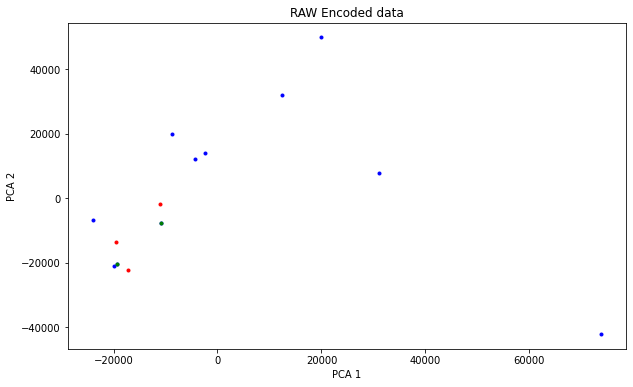

In [10]:
%matplotlib inline

fig,ax = plt.subplots(figsize = (10,6))
ax.plot(Bert_PCA[:3,0],Bert_PCA[:3,1], 'r.',lw = 1)
ax.plot(Bert_PCA[3:,0],Bert_PCA[3:,1], 'b.',lw = 1)
ax.plot(Bert_PCA[11:13,0],Bert_PCA[11:13,1], 'g.',lw = 1)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('RAW Encoded data')

plt.show()

TSNE dimensionality reduction to visualize the same components as in PCA.

In [ ]:
tsne = TSNE(n_components=2, random_state = 0)

Bert_TSNE = tsne.fit_transform(padded_bert)

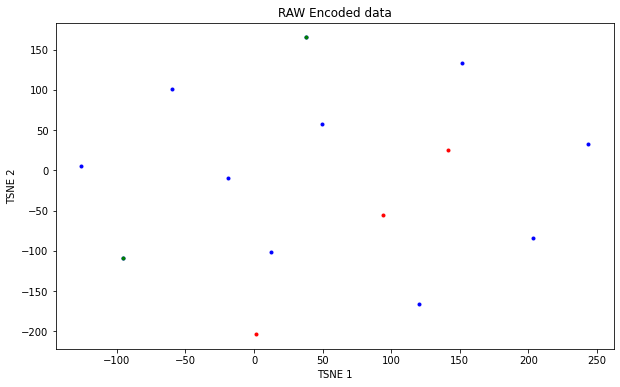

In [12]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(Bert_TSNE[:3,0],Bert_TSNE[:3,1], 'r.',lw = 1)
ax.plot(Bert_TSNE[3:,0],Bert_TSNE[3:,1], 'b.',lw = 1)
ax.plot(Bert_TSNE[11:13,0],Bert_TSNE[11:13,1], 'g.',lw = 1)
ax.set_xlabel('TSNE 1')
ax.set_ylabel('TSNE 2')
ax.set_title('RAW Encoded data')

plt.show()

Simple functions to find the distance of each vector from the center of the correct answers.

In [13]:
def center(matrix):
  center = np.zeros(len(matrix[0]))
  for i in range(len(matrix[0])):
    for array in matrix:
      center[i] = center[i] + array[i]
  return center/len(matrix[:,0])

def dist(matrix,center):
  distances = []
  for array in matrix:
    distances.append(np.linalg.norm(array - center))

  return distances

In [14]:
correct = padded_bert[:3]

distances = dist(padded_bert,center(correct))

Plotting the distances of all the answers from the center of the correct answers. The blue line indicates the furthest correct answer from the center and the green line indicates the closest incorrect answer.

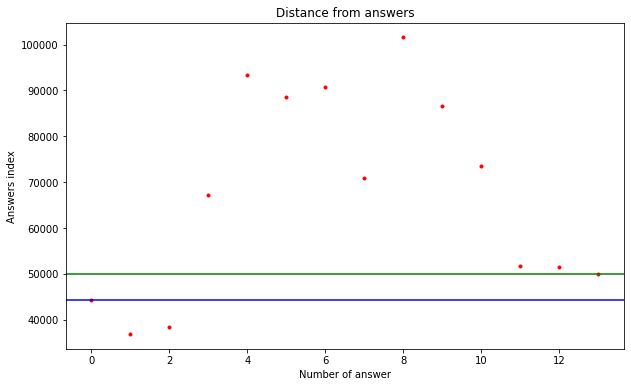

In [15]:
fig,ax = plt.subplots(figsize = (10,6))
ax.plot(np.arange(len(distances)),distances,'r.')
ax.axhline(y=distances[0], color='b', linestyle='-')
ax.axhline(y=distances[13], color='g', linestyle='-')
ax.set_xlabel('Number of answer')
ax.set_ylabel('Answers index')
ax.set_title('Distance from answers')

plt.show()